In [18]:
#picaso
import picaso.opacity_factory as opa_fa
from picaso import justdoit as jdi
from picaso import justplotit as jpi
#plotting
from bokeh.io import output_notebook

output_notebook()
from bokeh.plotting import show,figure

Loading BokehJS ...

In [19]:
wave_range = [0.4,2]

opa = jdi.opannection(wave_range=wave_range)

In [20]:
case1 = jdi.inputs()
case1.phase_angle(phase=60*np.pi/180, num_tangle=6, num_gangle=6)
case1.gravity(gravity=20 , gravity_unit=u.Unit('m/s**2'))
case1.atmosphere(filename = jdi.jupiter_pt(), delim_whitespace=True)
case1.star(opa, 5000,0,4.0)
df = case1.spectrum(opa, calculation='reflected' ,full_output=True)

<Figure size 800x600 with 0 Axes>

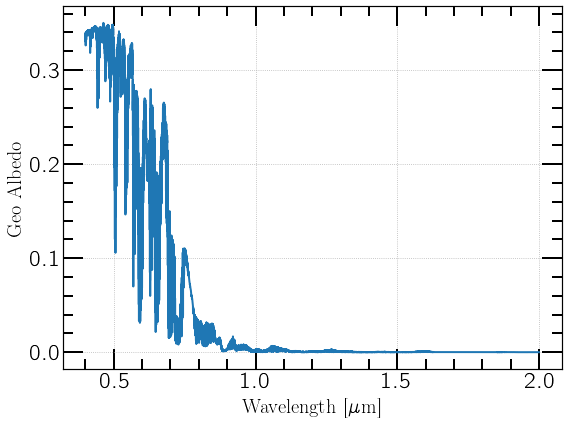

In [6]:
x,y = df['wavenumber'], df['albedo']
plt.figure()
plt.figure(figsize=(8,6))
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.plot(1e4/x, y, lw=2)

plt.gca().set_xlabel(r'Wavelength [$\mu$m]')
plt.gca().set_ylabel('Geo Albedo')
plt.grid(ls=':')
plt.tight_layout()

In [9]:
case1 = jdi.inputs()
case1.phase_angle(phase=60*np.pi/180, num_tangle=6, num_gangle=6)
case2 = jdi.inputs()
case2.phase_angle(0)
case3 = jdi.inputs()
case3.phase_angle(phase=60*np.pi/180, num_tangle=10, num_gangle=10)
cases = [case1, case2, case3]
for i in cases:i.gravity(gravity=20 , gravity_unit=u.Unit('m/s**2'))
for i in cases:i.atmosphere(filename = jdi.jupiter_pt(), delim_whitespace=True)
for i in cases:i.star(opa, 5000,0,4.0)

import time
names = ['6x6_60','1x10','10x10_60']
df = {}
for i,ikey in zip(cases, names):
    start = time.time()
    df[ikey] = i.spectrum(opa,calculation='reflected' ,full_output=True)
    stop = time.time()
    print(ikey, stop-start)

6x6_60 14.545583963394165
1x10 3.3034088611602783
10x10_60 43.017767906188965


In [10]:
to_compare = []
fraction_compare = []
for ikey in names:
    x,y = df[ikey]['wavenumber'], df[ikey]['albedo']
    x,y = jdi.mean_regrid(x, y, R=100) #wavenumber, erg/cm2/s/Hz
    df[ikey]['regridy'] =  y
    df[ikey]['regridx'] = x
    to_compare += [df[ikey]['regridy']]

show(jpi.spectrum([x]*len(to_compare),to_compare, legend=names
                  ,plot_width=800))

6x6_60


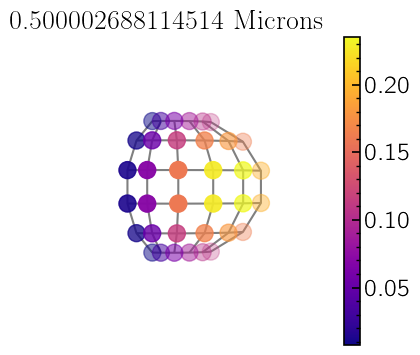

1x10


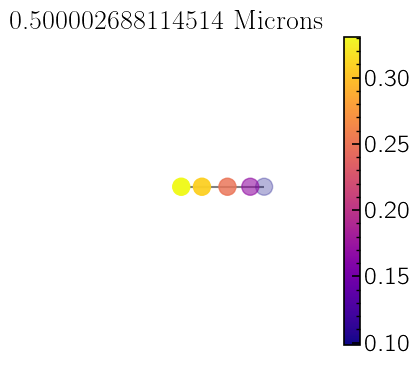

10x10_60


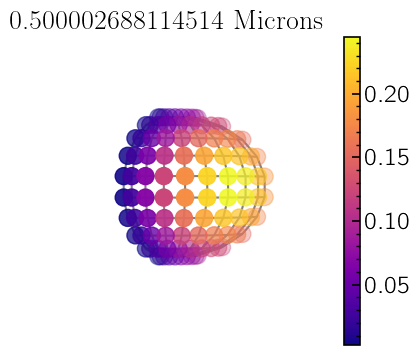

In [11]:
for ikey in names:
    asdict = df[ikey]['full_output']
    print(ikey)
    jpi.disco(asdict, calculation='reflected', wavelength=[0.5])

In [15]:
phases = [0,30,45,60,90,120,135,140,160,170]
cases = []

for i in range(len(phases)):
    case = jdi.inputs()
    case.phase_angle(phase=phases[i]*np.pi/180, num_tangle=6, num_gangle=6)
    case.gravity(gravity=20 , gravity_unit=u.Unit('m/s**2'))
    case.atmosphere(filename = jdi.jupiter_pt(), delim_whitespace=True)
    case.star(opa, 5000,0,4.0)
    cases.append(case)

import time
names = [str(phase) for phase in phases]
df = {}
for i,ikey in zip(cases, names):
    start = time.time()
    df[ikey] = i.spectrum(opa,calculation='reflected' ,full_output=True)
    stop = time.time()
    print(ikey, stop-start)

0 17.214042901992798
30 15.252986907958984
45 15.873836994171143
60 15.662183046340942
90 15.700148105621338
120 15.84183406829834
135 15.362955808639526
140 15.247550010681152
160 15.356000185012817
170 15.331410884857178


In [16]:
to_compare = []
fraction_compare = []
for ikey in names:
    x,y = df[ikey]['wavenumber'], df[ikey]['albedo']
    x,y = jdi.mean_regrid(x, y, R=100) #wavenumber, erg/cm2/s/Hz
    df[ikey]['regridy'] =  y
    df[ikey]['regridx'] = x
    to_compare += [df[ikey]['regridy']]

show(jpi.spectrum([x]*len(to_compare),to_compare, legend=names
                  ,plot_width=800))

In [43]:
case1 = jdi.inputs()
case1.phase_angle(phase=60*np.pi/180, num_tangle=6, num_gangle=6)
case1.gravity(gravity=20 , gravity_unit=u.Unit('m/s**2'))
case1.atmosphere(filename = jdi.jupiter_pt(), delim_whitespace=True)
case1.star(opa, 5000,0,4.0, semi_major = 1, semi_major_unit = u.au)
case1.gravity(radius=1, radius_unit=u.Rjup, 
            mass = 1, mass_unit=u.Mjup)

df = case1.spectrum(opa, calculation='reflected' ,full_output=True)
wno,alb = jdi.mean_regrid(df['wavenumber'],
                          df['albedo'], R=150)
wno,fpfs = jdi.mean_regrid(df['wavenumber'],
                          df['fpfs_reflected'], R=150)

case1.inputs['star']

{'database': 'ck04models',
 'temp': 5000,
 'metal': 0,
 'logg': 4.0,
 'radius': nan,
 'radius_unit': 'Radius not supplied',
 'flux': array([4.51411234e+13, 4.51485245e+13, 4.51559263e+13, ...,
        2.51120806e+14, 2.50622913e+14, 2.50124970e+14]),
 'wno': array([ 5000.44494459,  5000.94501408,  5001.44513359, ...,
        24993.77758607, 24996.2770888 , 24998.77684149]),
 'semi_major': 14959787070000.0,
 'semi_major_unit': 'cm'}

<IPython.core.display.Javascript object>


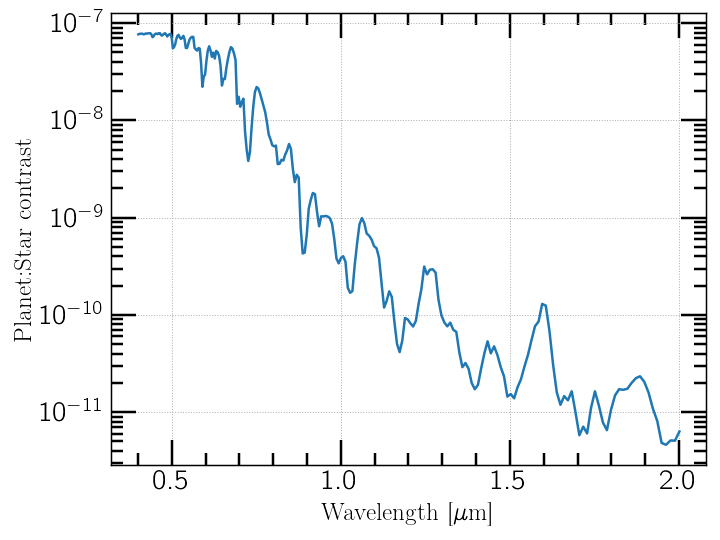

In [36]:
# reflected plot
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.plot(1e4/wno, fpfs, lw=2)
plt.gca().set_yscale('log')

plt.gca().set_xlabel(r'Wavelength [$\mu$m]')
plt.gca().set_ylabel('Planet:Star contrast')
plt.grid(ls=':')
plt.tight_layout()

<IPython.core.display.Javascript object>


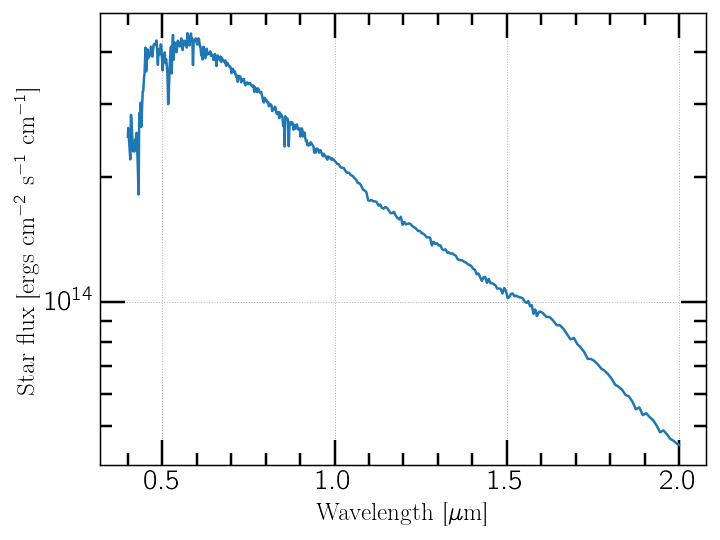

In [44]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.plot(1e4/case1.inputs['star']['wno'],case1.inputs['star']['flux'], lw=2)
plt.gca().set_yscale('log')

plt.gca().set_xlabel(r'Wavelength [$\mu$m]')
plt.gca().set_ylabel(r'Star flux [ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$]')
plt.grid(ls=':')
plt.tight_layout()


In [51]:
len(1e4/case1.inputs['star']['wno']),len(wno)
print(np.min(case1.inputs['star']['wno']), np.max(case1.inputs['star']['wno']))
print(np.min(wno),np.max(wno))
from scipy.interpolate import interp1d
func = interp1d(case1.inputs['star']['wno'],case1.inputs['star']['flux'],fill_value="extrapolate")
resampled_star_flux = func(wno)
len(resampled_star_flux),len(1e4/case1.inputs['star']['wno']),len(wno)

5000.444944586285 24998.7768414916
4996.943821805973 24915.72442673581


(242, 16094, 242)

<IPython.core.display.Javascript object>


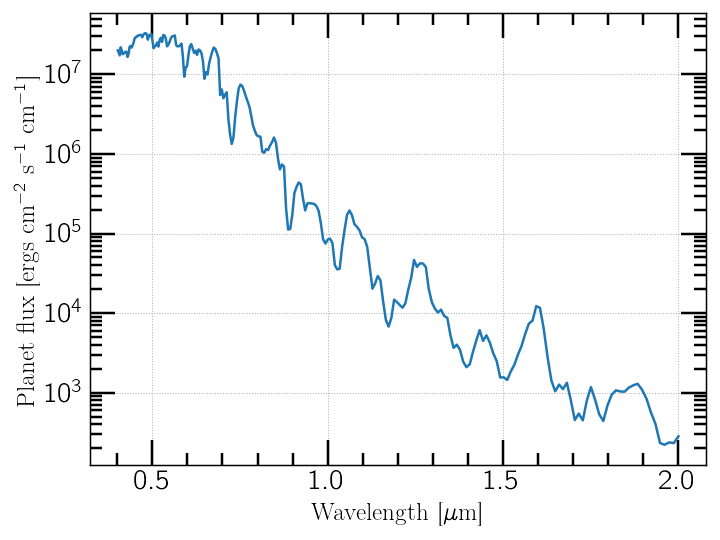

In [52]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.plot(1e4/wno,resampled_star_flux*fpfs, lw=2)
plt.gca().set_yscale('log')

plt.gca().set_xlabel(r'Wavelength [$\mu$m]')
plt.gca().set_ylabel(r'Planet flux [ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$]')
plt.grid(ls=':')
plt.tight_layout()

<IPython.core.display.Javascript object>


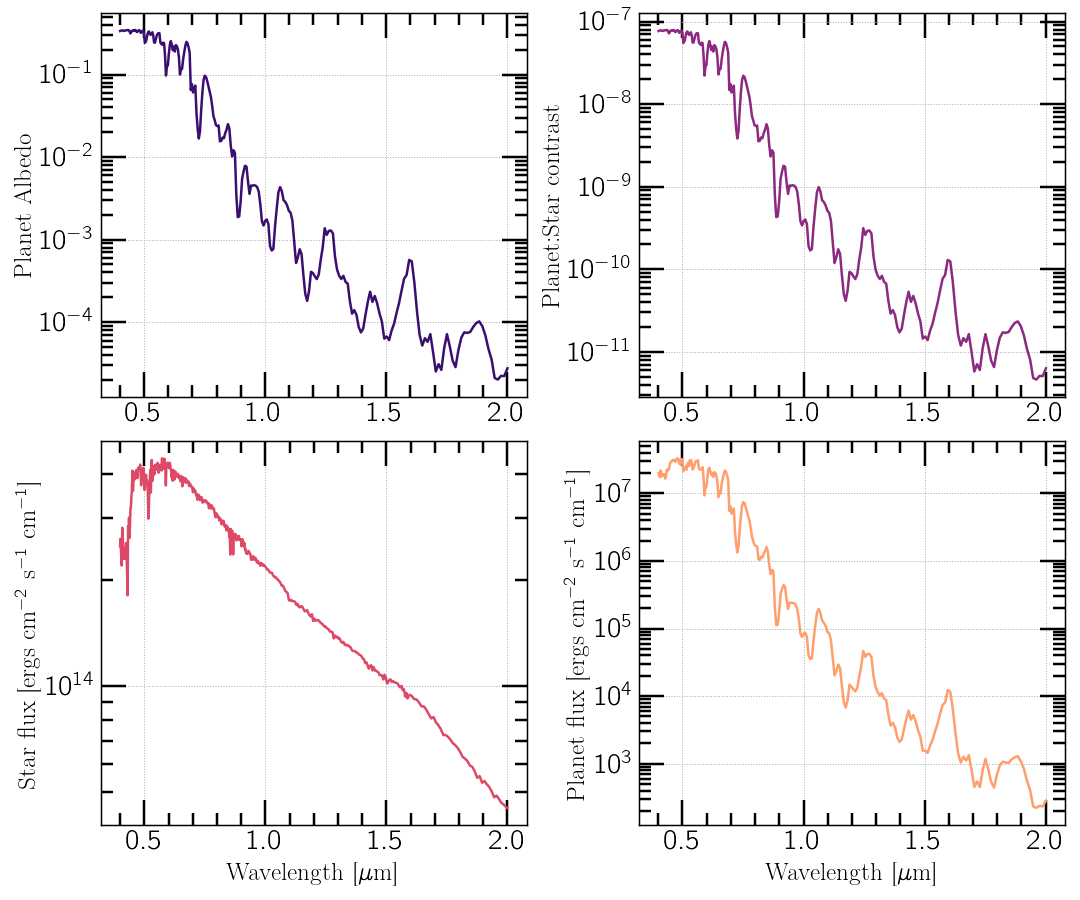

In [60]:
def Make4SpectrumPlot(PlanetWNO,PlanetAlbedo,PlanetFPFS,StarWNO,StarFlux,colormap = 'magma'):
    import matplotlib
    cmap = matplotlib.cm.get_cmap(colormap)
    n = 6
    cs = np.linspace(0,1,n)
    colors = cmap(cs)
    
    
    fig, axs = plt.subplots(2, 2, figsize=(12,10))
    ax1 = axs[0, 0]
    ax2 = axs[0, 1]
    ax3 = axs[1, 0]
    ax4 = axs[1, 1]
    
    ax1.minorticks_on()
    ax1.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
    ax1.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
    ax1.plot(1e4/PlanetWNO, PlanetAlbedo, lw=2, color=colors[1])
    ax1.set_yscale('log')
    #ax1.set_xlabel(r'Wavelength [$\mu$m]')
    ax1.set_ylabel('Planet Albedo')
    ax1.grid(ls=':')
    
    
    ax2.minorticks_on()
    ax2.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
    ax2.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
    ax2.plot(1e4/PlanetWNO, PlanetFPFS, lw=2, color=colors[2])
    ax2.set_yscale('log')
    #ax2.set_xlabel(r'Wavelength [$\mu$m]')
    ax2.set_ylabel('Planet:Star contrast')
    ax2.grid(ls=':')
    
    
    ax3.minorticks_on()
    ax3.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
    ax3.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
    ax3.plot(1e4/StarWNO, StarFlux, lw=2, color=colors[3])
    ax3.set_yscale('log')
    ax3.set_xlabel(r'Wavelength [$\mu$m]')
    ax3.set_ylabel(r'Star flux [ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$]')
    ax3.grid(ls=':')
    
    from scipy.interpolate import interp1d
    func = interp1d(StarWNO,StarFlux,fill_value="extrapolate")
    ResampledStarFlux = func(PlanetWNO)
    ax4.minorticks_on()
    ax4.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
    ax4.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
    ax4.plot(1e4/PlanetWNO, ResampledStarFlux*PlanetFPFS, lw=2, color=colors[4])
    ax4.set_yscale('log')
    ax4.set_xlabel(r'Wavelength [$\mu$m]')
    ax4.set_ylabel(r'Planet flux [ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$]')
    ax4.grid(ls=':')

    
    plt.tight_layout()
    return fig
    
    
fig = Make4SpectrumPlot(wno,alb,fpfs,case1.inputs['star']['wno'],case1.inputs['star']['flux'])

In [61]:
fig.savefig('test')